<a href="https://colab.research.google.com/github/jchou03/art_era_ai/blob/main/art_era_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Data/ContemporaryDS340DB.csv')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      700 non-null    object
 1   Year       700 non-null    int64 
 2   Title_URL  700 non-null    object
 3   Image      700 non-null    object
 4   Artist     700 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.5+ KB


In [42]:
import re
def extract_year_from_title(title):
    # Use regular expressions to find a 4-digit number in the title
    match = re.search(r'\b\d{4}\b', title)
    if match:
        year = int(match.group(0))
        return year
    else:
        match = re.search(r'(\d{4})s', title)
        if match:
          year = int(match.group(1))
          return year
        else:
          print("fail")


def getdecade(df):
  decade = []
  for i in range(len(df)):
    (title, year) = df.loc[i, "Title"], df.loc[i, "Year"]
    if year != 1972:
      decadeval = year - (year % 10)
      #print(decadeval, year)
      decade.append(decadeval)
    else:
      newyear = extract_year_from_title(title)
      decadeval = newyear - (newyear % 10)
      #print(decadeval, year)
      decade.append(decadeval)
  return decade


df['Decade'] = getdecade(df)
df = df.replace(4650, 1950)

<BarContainer object of 8 artists>

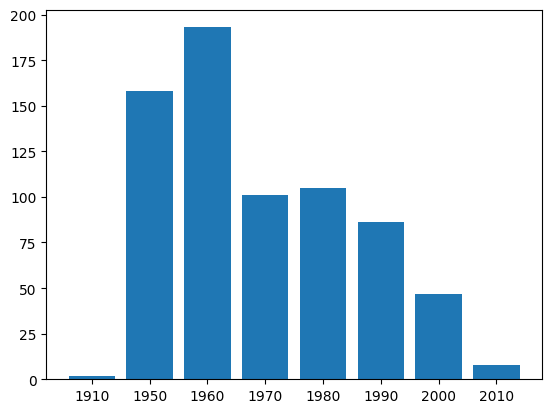

In [64]:
#df.groupby(['Decade']).count()
x = ['1910', '1950', '1960', '1970', '1980', '1990', '2000', '2010']
y = [2, 158, 193, 101, 105, 86, 47, 8]
plt.bar(x, y)

In [70]:
from pandas.core.frame import DataFrame
from IPython.display import HTML
def Create_Link(df):
  i = 0
  for x in range(len(df)):
    input = df.loc[x, "Image"]
    #index = df.loc[x, "index"]
    html = f'<a href={input}>{i}</a>'
    df = df.replace(input, html)
    i += 1
  return df

check = Create_Link(df)
check

,Title,Year,Title_URL,Image,Artist,Decade
0,"Starry Night and the Astronauts, 1972",1972,https://www.artic.edu/artworks/129884/starry-n...,<a href=https://www.artic.edu/iiif/2/e966799b-...,Alma Thomas,1970
1,"Many Mansions, 1994",1994,https://www.artic.edu/artworks/137125/many-man...,<a href=https://www.artic.edu/iiif/2/d94d0e3d-...,Kerry James Marshall,1990
2,"Untitled, 1964",1964,https://www.artic.edu/artworks/229393/untitled,<a href=https://www.artic.edu/iiif/2/7690dd6e-...,Tanaka Atsuko,1960
3,"City Landscape, 1955",1955,https://www.artic.edu/artworks/86385/city-land...,<a href=https://www.artic.edu/iiif/2/f7f9615d-...,Joan Mitchell,1950
4,"Hero Construction, 1958",1958,https://www.artic.edu/artworks/8633/hero-const...,<a href=https://www.artic.edu/iiif/2/62f2ca7a-...,Richard Hunt,1950
...,...,...,...,...,...,...
695,"Last Light, from the series “Immediate Family”...",1990,https://www.artic.edu/artworks/184397/last-lig...,<a href=https://www.artic.edu/iiif/2/4cf8f655-...,Sally Mann,1990
696,"“De Panne, Belgium, August 7, 1992,” from Beac...",1972,https://www.artic.edu/artworks/180801/de-panne...,<a href=https://www.artic.edu/iiif/2/e662b5e2-...,Rineke Dijkstra,1990
697,"Cryptic XV, 1966",1966,https://www.artic.edu/artworks/46139/cryptic-xv,<a href=https://www.artic.edu/iiif/2/566330da-...,Louise Nevelson,1960
698,"Vast Ocean, 1964",1964,https://www.artic.edu/artworks/27107/vast-ocean,<a href=https://www.artic.edu/iiif/2/a41938e3-...,Günther Uecker,1960
